In [12]:
from schmeud import qlm
import gsd.hoomd
import numpy as np

import matplotlib.pyplot as plt

import signac
from monk import pair, prep, methods, workflow

import glob

config = workflow.get_config()

In [4]:
project = signac.get_project(root=config['root'])

In [5]:
pair = qlm.BidispHertz()
qlm_comp = qlm.QLM(pair)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
13 13
13 14
13 15
13 16
13 17
13 18
13 19
14 14
14 15
14 16
14 17
14 18
14 19
15 15
15 16
15 17
15 18
15 19
16 16
16 1

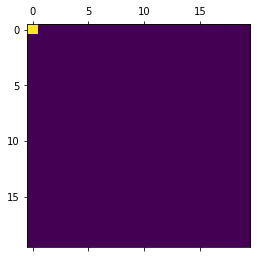

In [14]:
for job in project:
    traj = gsd.hoomd.open(job.fn('traj.gsd'))
    init_snap = traj[0]
    # final_snap = traj[-1]
    eig_vals, eig_vecs = qlm_comp.compute(init_snap, k=20, filter=True, sigma=0)
    proj_vecs = [np.linalg.norm(vec, axis=-1) for vec in eig_vecs]
    data = np.zeros((20, 20), dtype=np.float32)
    for i in range(len(proj_vecs)):
        for j in range(i, len(proj_vecs)):
            data[i,j] = np.dot(proj_vecs[i], proj_vecs[j])
            print(i,j)
    plt.matshow(data)
    
    break

In [15]:
data

array([[1.31963306e+03, 3.73483868e-03, 1.37870130e-03, 1.15461361e+00,
        9.52516496e-01, 9.00642395e+00, 5.80028653e-01, 1.54999709e+00,
        2.44152975e+00, 2.49456048e+00, 3.28078389e+00, 1.94393015e+00,
        1.95087719e+00, 4.47387743e+00, 2.67811704e+00, 2.17962623e+00,
        6.25183392e+00, 1.86244440e+00, 5.46754122e+00, 3.64220023e+00],
       [0.00000000e+00, 1.05703775e-08, 3.90201427e-09, 3.26779877e-06,
        2.69582165e-06, 2.54900697e-05, 1.64160281e-06, 4.38681718e-06,
        6.91004198e-06, 7.06012952e-06, 9.28530699e-06, 5.50173036e-06,
        5.52139181e-06, 1.26620116e-05, 7.57963335e-06, 6.16879970e-06,
        1.76940011e-05, 5.27110888e-06, 1.54742884e-05, 1.03081911e-05],
       [0.00000000e+00, 0.00000000e+00, 1.44041357e-09, 1.20629534e-06,
        9.95152163e-07, 9.40956124e-06, 6.05991374e-07, 1.61937669e-06,
        2.55081545e-06, 2.60621982e-06, 3.42763542e-06, 2.03094260e-06,
        2.03820059e-06, 4.67413338e-06, 2.79799269e-06, 2.2771

In [4]:
glob.glob(job.fn("*"))

['/media/ian/Data2/monk/oscillatory-mem/workspace/f7d05e1131aae68409d7285ed92de770/signac_job_document.json',
 '/media/ian/Data2/monk/oscillatory-mem/workspace/f7d05e1131aae68409d7285ed92de770/traj.gsd',
 '/media/ian/Data2/monk/oscillatory-mem/workspace/f7d05e1131aae68409d7285ed92de770/quench.gsd',
 '/media/ian/Data2/monk/oscillatory-mem/workspace/f7d05e1131aae68409d7285ed92de770/signac_statepoint.json',
 '/media/ian/Data2/monk/oscillatory-mem/workspace/f7d05e1131aae68409d7285ed92de770/init.gsd']